In [1]:
%matplotlib inline
import sys
from datetime import datetime as dt

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sys.path.append('../')
from util.feature import add_feature, fillna

sns.set(style='white')
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [3]:
train_data = pd.read_csv('../data/d_train_20180102.csv')
test_data = pd.read_csv('../data/d_test_A_20180102.csv')
test_data['血糖'] = -1
data = pd.concat([train_data, test_data], ignore_index=True)
data = fillna(data)
data = add_feature(data)

D:\Anaconda3\lib\site-packages\lightgbm\basic.py:1023: UserWarning: categorical_feature in Dataset is overrided. New categorical_feature is ['性别']
  warnings.warn('categorical_feature in Dataset is overrided. New categorical_feature is {}'.format(sorted(list(categorical_feature))))
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\Anaconda3\lib\site-packages\lightgbm\basic.py:662: UserWarning: categorical_feature in param dict is overrided.
  warnings.warn('categorical_feature in param dict is overrided.')


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5642 entries, 0 to 5641
Data columns (total 42 columns):
id             5642 non-null int64
性别             5642 non-null object
年龄             5642 non-null int64
体检日期           5642 non-null object
*天门冬氨酸氨基转换酶    4421 non-null float64
*丙氨酸氨基转换酶      4421 non-null float64
*碱性磷酸酶         4421 non-null float64
*r-谷氨酰基转换酶     4421 non-null float64
*总蛋白           4421 non-null float64
白蛋白            4421 non-null float64
*球蛋白           4421 non-null float64
白球比例           4421 non-null float64
甘油三酯           4423 non-null float64
总胆固醇           4423 non-null float64
高密度脂蛋白胆固醇      4423 non-null float64
低密度脂蛋白胆固醇      4423 non-null float64
尿素             4264 non-null float64
肌酐             4264 non-null float64
尿酸             4264 non-null float64
乙肝表面抗原         1363 non-null float64
乙肝表面抗体         1363 non-null float64
乙肝e抗原          1363 non-null float64
乙肝e抗体          1363 non-null float64
乙肝核心抗体         1363 non-null float64
白细胞计数      

In [5]:
columns_na = train_data.columns[train_data.isna().sum() > 0]
columns_na

Index(['*天门冬氨酸氨基转换酶', '*丙氨酸氨基转换酶', '*碱性磷酸酶', '*r-谷氨酰基转换酶', '*总蛋白', '白蛋白',
       '*球蛋白', '白球比例', '甘油三酯', '总胆固醇', '高密度脂蛋白胆固醇', '低密度脂蛋白胆固醇', '尿素', '肌酐',
       '尿酸', '乙肝表面抗原', '乙肝表面抗体', '乙肝e抗原', '乙肝e抗体', '乙肝核心抗体', '白细胞计数', '红细胞计数',
       '血红蛋白', '红细胞压积', '红细胞平均体积', '红细胞平均血红蛋白量', '红细胞平均血红蛋白浓度', '红细胞体积分布宽度',
       '血小板计数', '血小板平均体积', '血小板体积分布宽度', '血小板比积', '中性粒细胞%', '淋巴细胞%', '单核细胞%',
       '嗜酸细胞%', '嗜碱细胞%'],
      dtype='object')

In [6]:
columns_sample = train_data.loc[train_data.isna().sum(axis=1) == 0, :]
columns_sample

,id,性别,年龄,体检日期,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
2,3,男,46,26/10/2017,20.82,15.23,63.69,38.17,86.23,48.00,...,241.0,8.3,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59
5,6,女,74,18/10/2017,23.72,22.59,81.23,23.35,76.46,45.85,...,249.0,8.5,17.0,0.211,42.9,47.0,7.1,2.1,1.0,5.97
8,9,男,39,16/10/2017,21.70,39.17,102.91,67.09,76.12,49.31,...,275.0,9.8,11.4,0.270,53.1,35.9,7.3,3.3,0.4,5.66
9,10,女,35,10/10/2017,18.89,15.79,78.21,25.75,75.94,46.64,...,247.0,10.7,12.6,0.270,65.6,27.3,5.4,1.0,0.7,5.48
165,167,女,50,20/10/2017,21.20,13.25,59.69,17.04,77.54,42.98,...,301.0,9.7,10.8,0.290,57.9,29.7,10.8,1.0,0.6,5.00
166,168,女,45,20/10/2017,19.24,21.73,82.89,24.31,77.84,45.73,...,334.0,9.7,11.0,0.320,57.9,29.2,8.1,3.8,1.0,5.48
188,190,男,39,21/09/2017,22.89,23.97,82.17,19.52,73.38,42.71,...,193.0,10.7,14.0,0.210,57.2,35.0,6.4,1.2,0.2,4.19
289,291,女,39,21/09/2017,21.96,18.43,57.86,16.06,72.29,43.63,...,239.0,12.0,15.9,0.290,54.1,35.5,4.8,4.6,1.0,5.02
380,383,女,65,21/09/2017,21.68,19.23,99.43,24.31,72.26,40.99,...,244.0,11.5,13.6,0.280,55.3,33.2,8.3,2.4,0.8,5.76
394,397,男,24,20/10/2017,22.97,16.51,64.32,25.25,77.55,50.75,...,287.0,10.6,13.0,0.300,52.0,39.7,6.6,1.4,0.3,4.72


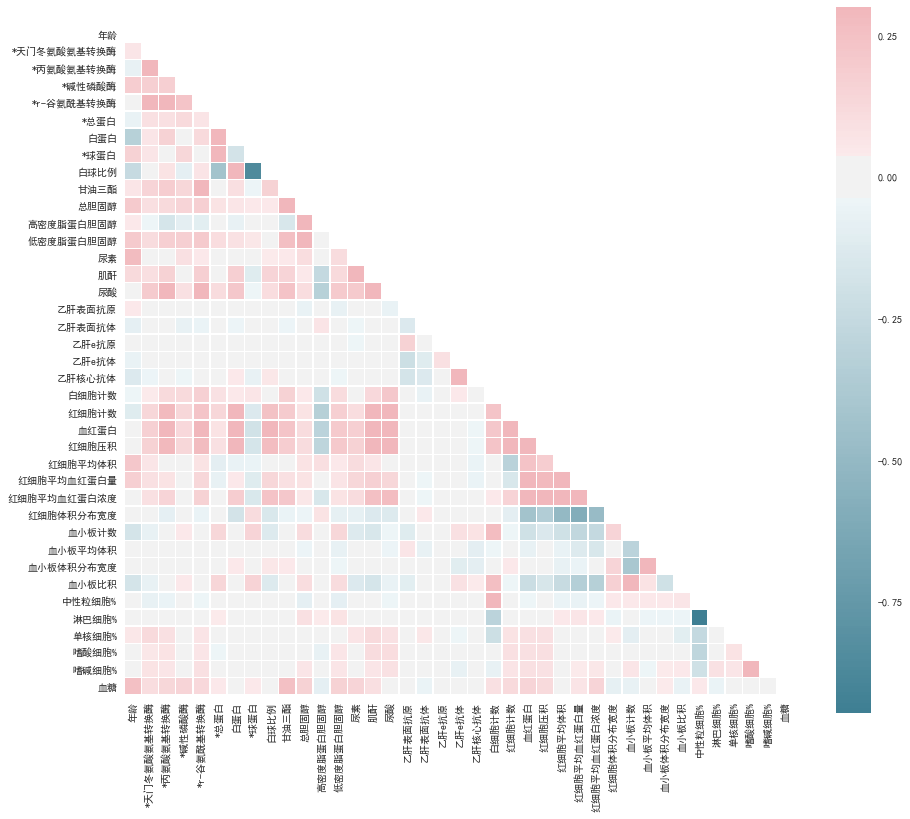

In [7]:
corr = train_data.loc[:, '年龄':].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig_corr, ax_corr = plt.subplots(figsize=(15, 13))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidth=.5, ax=ax_corr)

(-50, 810)

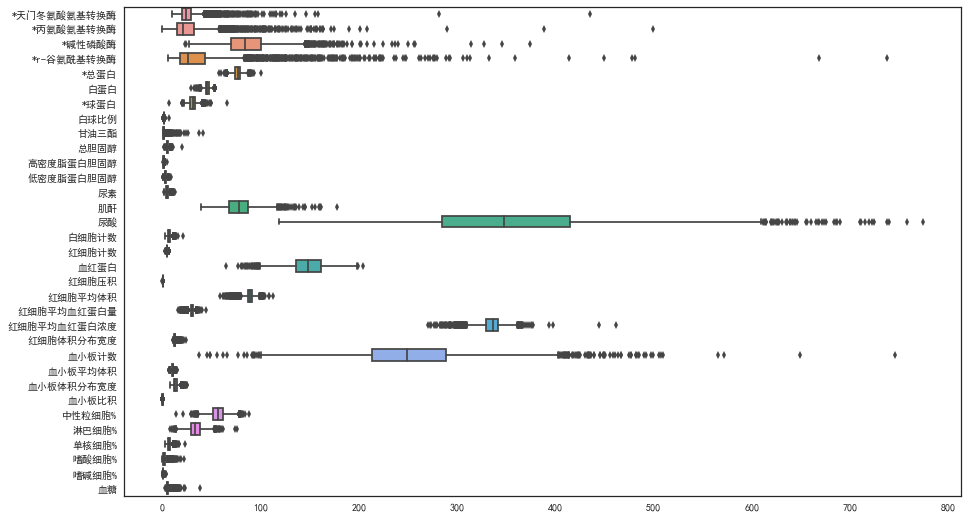

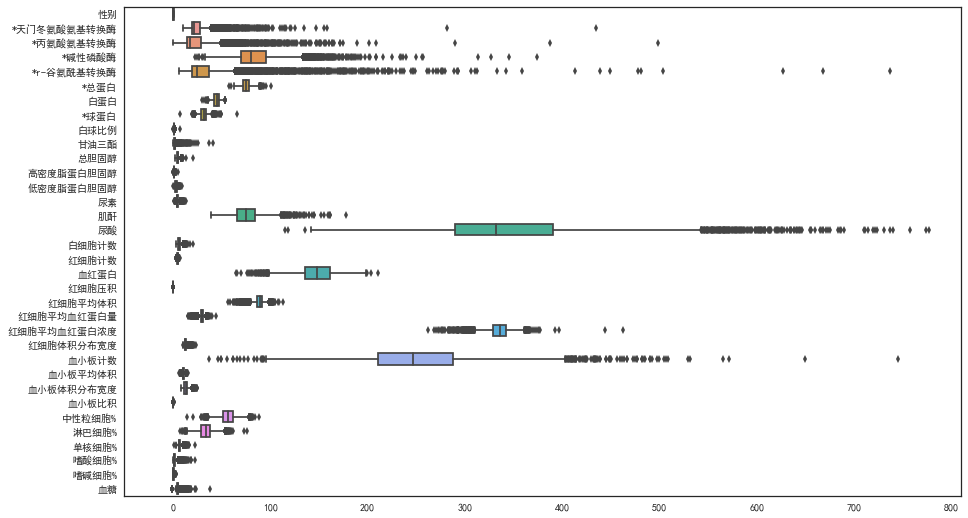

In [16]:
fig_boxt, ax_boxt = plt.subplots(figsize=(15, 9))
XTrain = train_data.loc[:, [column for column in train_data.columns if column not in 
                        ['id', '年龄', '体检日期', '乙肝表面抗原',
                         '乙肝表面抗体', '乙肝e抗原', '乙肝e抗体', '乙肝核心抗体',
                         'dayofyear']]]
sns.boxplot(data=XTrain, orient="h", ax=ax_boxt)

fig_boxa, ax_boxa = plt.subplots(figsize=(15, 9))
XALL = data.loc[:, [column for column in train_data.columns if column not in 
                    ['id', '年龄', '体检日期', '乙肝表面抗原',
                     '乙肝表面抗体', '乙肝e抗原', '乙肝e抗体', '乙肝核心抗体',
                     'dayofyear']]]
sns.boxplot(data=XALL, orient="h", ax=ax_boxa)
ax_boxa.set_xlim(left=-50, right=810)

In [9]:
feature = data.loc[:, [column for column in data.columns if column not in 
                ['id', '性别', '血糖', '体检日期', '乙肝表面抗原',
                 '乙肝表面抗体', '乙肝e抗原', '乙肝e抗体', '乙肝核心抗体',
                 'dayofyear']]]
scaler = MinMaxScaler()
scaler.fit(feature)
feature = scaler.transform(feature)

X_embedded = TSNE(n_components=2).fit_transform(feature)

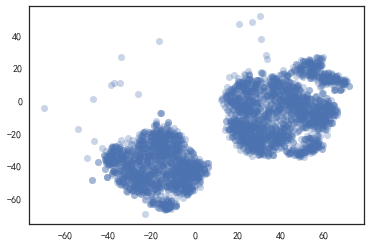

In [17]:
fig_embed, ax_embed = plt.subplots()
# ax_embed.scatter(X_embedded[:, 0], X_embedded[:, 1], c=data['性别'], linewidths=0.01, alpha=0.3)
ax_embed.scatter(X_embedded[data['性别'] == 1, 0], X_embedded[data['性别'] == 1, 1], linewidths=0.01, alpha=0.3)

In [11]:
from pandas.api.types import is_object_dtype
test = pd.read_csv('../data/d_test_A_20180102.csv')
test = add_feature(test)

In [12]:
is_object_dtype(test['性别'])

False